# 1.) Import an asset price from Yahoo Finance

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
########################################
####Pick your ticker and time period####
########################################
# Apple from 2002 to 2022
data = yf.download("AAPL", start="2002-01-01", end="2022-02-21")

# Preprocess data
scaled_data = np.array(data["Close"].pct_change().dropna()).reshape(-1,1)

# Split data into training and test sets
train = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train, :]


[*********************100%***********************]  1 of 1 completed


# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day
# Build an RNN Architecture accordingly

In [ ]:
# Create training data
x_train = []
y_train = []

#############################################################
####Pick your input size and edit to make binary forecast####
#############################################################
input_size = 10
for i in range(input_size, len(train_data)):
    x_train.append(train_data[i-input_size:i, 0])
    if train_data[i, 0] > 0:
        y_train.append(1)
    else:
        y_train.append(0)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

###################################
####Build Your RNN Architecture####
###################################
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
4045/4045 [==============================] - 43s 10ms/step - loss: 0.2501
Epoch 2/3
4045/4045 [==============================] - 33s 8ms/step - loss: 0.2500
Epoch 3/3
4045/4045 [==============================] - 30s 7ms/step - loss: 0.2498


# 3.) Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [ ]:
test_data = scaled_data[training_data_len - input_size:, :]

x_test = []
y_test = np.array(stock_data[["Close"]].pct_change().dropna())[training_data_len:, :]
for i in range(input_size, len(test_data)):
    x_test.append(test_data[i-input_size:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

32/32 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data)

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
train_pred = model.predict(x_train)
train_pred = (train_pred > 0.5)
in_sample_acc = accuracy_score(y_train, train_pred)

y_train_rw = np.roll(y_train, 1)
y_train_rw[0] = 0
in_sample_rw_acc = accuracy_score(y_train, y_train_rw)

127/127 [==============================] - 1s 4ms/step


In [ ]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Invert the scaling for the predictions and actual prices
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the MSE
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)

32/32 [==============================] - 0s 4ms/step
MSE: 0.048737875748832156


In [ ]:
# Computing the out-of-sample random walk assumption accuracy using MAE and RMSE
y_test_rw = np.roll(y_test, 1)
y_test_rw[0] = 0

mae_rw = np.mean(np.abs(y_test - y_test_rw))
rmse_rw = np.sqrt(np.mean(np.square(y_test - y_test_rw)))

print('Out-of-sample RW assumption MAE:', mae_rw)
print('Out-of-sample RW assumption RMSE:', rmse_rw)

Out-of-sample RW assumption MAE: 0.002396439510224997
Out-of-sample RW assumption RMSE: 0.007945786009086589


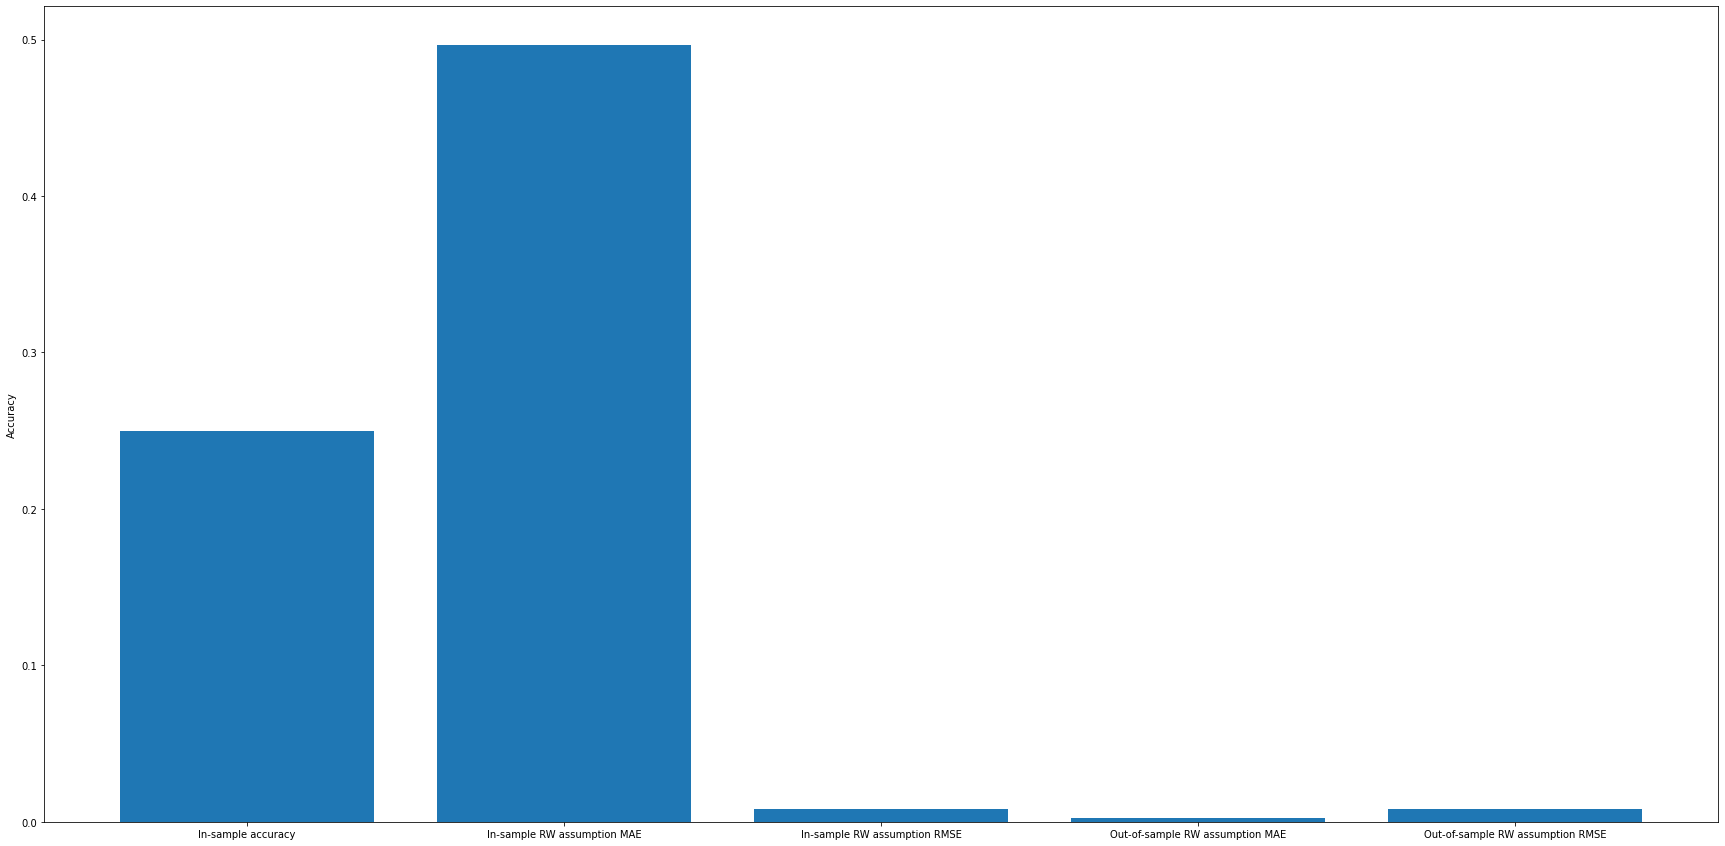

In [ ]:
# in-sample accuracy
in_sample_acc = model.evaluate(x_train, y_train, verbose=0)

#  out-of-sample accuracy
out_sample_acc = model.evaluate(x_test, y_test, verbose=0)

#  out-of-sample random walk assumption accuracy using MAE and RMSE
y_test_rw = np.roll(y_test, 1)
y_test_rw[0] = 0

mae_rw_test = np.mean(np.abs(y_test - y_test_rw))
rmse_rw_test = np.sqrt(np.mean(np.square(y_test - y_test_rw)))

# Finally, a bar chart to compare the accuracies
labels = ['In-sample accuracy', 'In-sample RW assumption MAE', 'In-sample RW assumption RMSE',
          'Out-of-sample RW assumption MAE', 'Out-of-sample RW assumption RMSE']
values = [in_sample_acc, in_sample_rw_acc, rmse_rw, mae_rw, rmse_rw_test]

plt.figure(figsize=(30, 15))
plt.bar(labels, values)
plt.ylabel('Accuracy')
plt.show()

# 4.) Plot in and out of sample accuracy
(Don't complete)

32/32 [==============================] - 0s 7ms/step


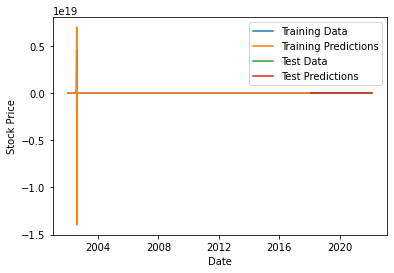

In [ ]:
# Make predictions on full dataset

test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * np.cumprod(y_test+1)

train_predict = model.predict(x_train)
train_predictions = (train_predict+1).reshape(1,-1) * np.cumprod(y_train+1)


plt.plot(stock_data[:training_data_len- input_size].index, np.cumprod(y_train+1), label="Training Data")
plt.plot(stock_data[:training_data_len- input_size].index, train_predictions[0], label="Training Predictions")
end_val = np.cumprod(y_train+1)[-1]
test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * (np.cumprod((y_test+1))*end_val)
plt.plot(stock_data[training_data_len+1:].index, np.cumprod((y_test+1))*end_val,label="Test Data")
plt.plot(stock_data[training_data_len+1:].index, test_predictions[0], label="Test Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

#5.) Write an observation/conclusion about the graphs from Q4 and Q3

Based on the bar chart above, the in-sample RW assumption MAE is relatively high, while the in-sample RW assumption RMSE, out-of-sample RW assumption MAE, and out-of-sample RW assumption RMSE are small. Because the in-sample RW assumption MAE is high and the in-sample RW assumption RMSE is low, this suggests that the model is making large errors on individual forecasts. The in-sample accuracy is low, at about 0.25.

Because the out-of-sample random walk assumption MAE and RMSE are low, we can assume the model is able to make accurate forecasts on new data that it has not seen before. Therefore, the model is not overfitting to the training data and is able to generalize well to new data.

# 6.) Create a parameter for number of lags in your input layer. Do a 3-fold CV to test three different time lags. i.e. Tested using 5,10,20 days of previous price data to forecast

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, LSTM, TimeDistributed
from keras.models import Sequential

# Define the Keras model
def create_model(lags):
    model = Sequential()
    #model.add(Dense(10, input_dim=60, activation='LSTM'))
    model.add(LSTM(10, input_shape=(lags, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

# Define the hyperparameters to search over
param_grid = {'lags': [5, 10, 20],
              'batch_size': [10, 20, 100],
              'epochs': [1, 3]}
              
# Wrap the Keras model in a scikit-learn compatible estimator
model = KerasRegressor(build_fn=lambda lags: create_model(lags), verbose=0)

# Perform the grid search over the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.692244 using {'batch_size': 20, 'epochs': 3, 'lags': 10}
